###Instruction
 - There are 8 problems. 100 Points each. The full score is 720.
 - Work in your notebook.
 - You may show your work on a separate sheet of A4. I'll also check there for partial credit. If you just give you answer without justification and it's wrong I can't give you any partial credit. Make sure you mark which question the scribble belongs to.
 - You may ask me for python syntax or matplotlib question. But, you know you can use shift-tab or ? for documentation.
 - Make sure your code works in order doing Kernel-->restart and then Cell--> Run All. Make sure what appears in the ouput is what you expect

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

###Problem 1)(100) 25 each.

1.1) Find first 3 **non-zero** terms taylor series expansion of
$$ f(x) = e^{x} $$ around $x=0$.

$$ a_0 = f(0) = 1 $$
$$ a_1 = f^1(0) = 1 $$
$$ a_2 = f^2(0) = 1 $$


In [15]:
fac = lambda x: x * fac(x - 1) if x != 0 else 1

In [16]:
f = lambda x, a: sum([a[i] * x**i / fac(i) for i in xrange(len(a))])

In [17]:
ais = [1, 1, 1]

1.2) Use the taylor above to estimate $$e^{0.1}$$.

In [19]:
f(0.1, ais)

1.105

1.3) What is the bound on **truncation error** for the estimate you got in 1.2)?

In [32]:
def calError_w(x):
    def calError(n):
        n = n + 1.
        return  np.exp(x) * (x**n)/fac(n)
    return calError

calError = calError_w(0.1)

print calError(2), calError(2) + f(0.1, ais), np.exp(0.1)

0.000184195153013 1.10518419515 1.10517091808


1.4) How many **non-zero** terms do I need such that the bound **truncation error** is less than $10^{-7}$?

In [36]:
i = 0
while calError(i) > 1e-7:
    i += 1
print i

4


###Problem 2) (100)

2.1) Use bisection method to find **all solutions** of

$$ \sin(x^2)/x^2 = 0.1 $$

for $x>0.1$. See pic below.

Make sure your answers are at most $10^{-4}$ away from the actual solution.

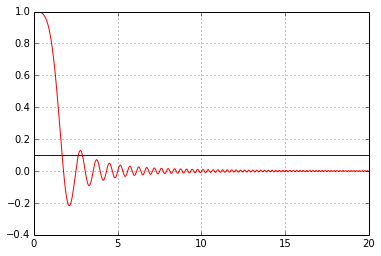

In [37]:
def f(x):
    return math.sin(x**2)/(x**2)
x = np.linspace(0.1,20,1000)
fx = [f(xx) for xx in x]
plt.plot(x,fx, 'r')
plt.axhline(0.1)
plt.grid()

(-0.05, 0.05)

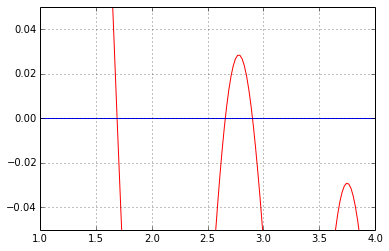

In [110]:
def f_new(x):
    return math.sin(x**2)/(x**2) - 0.1

def findInt_wrapper(cal):
    def findInt(fm, to):    
        mid = (fm + to)/2.
        while np.abs(cal(mid)) > 1e-10 and (to - fm) > 1e-10:
            if cal(mid) < 0 and cal(fm) > 0:
                to = mid
            else:
                fm = mid
            mid = (fm + to)/2.
        return mid
    return findInt

findInt = findInt_wrapper(f_new)

x = np.linspace(0.1,20,1000)
fx = [f_new(xx) for xx in x]
plt.plot(x,fx, 'r')
plt.axhline(0)
plt.grid()
plt.xlim(1, 4)
plt.ylim(-0.05, 0.05)


(-0.05, 0.05)

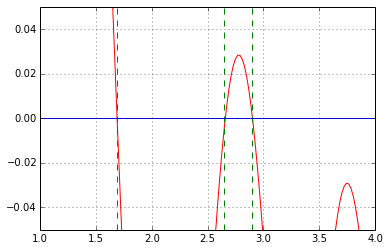

In [116]:
xs = [(1.5, 2), (2.5, 2.65), (2.6, 3.1)]
x_ints = [ findInt( xs[i][0], xs[i][1] ) for i in xrange(len(xs)) ]

x = np.linspace(0.1,20,1000)
fx = [f_new(xx) for xx in x]
plt.plot(x,fx, 'r')

for x_int in x_ints:
    plt.axvline(x_int, color = 'green', ls='--')
plt.axhline(0)
plt.grid()
plt.xlim(1, 4)
plt.ylim(-0.05, 0.05)
# plt.ylim(-1e-4, 1e-4)

In [117]:
x_ints

[1.6888877684250474, 2.6499999999650754, 2.9022756474092604]

###Problem 3) (100)

3.1) (90 points) Use Newton's method to find intersection of the following two lines.

$$f(x) = x^2 + 1$$

$$g(x) = x^3$$

Any **decent** result from Newton's method will get your full credit. You **must** use Newton's method. No credit will be given to any other method. 

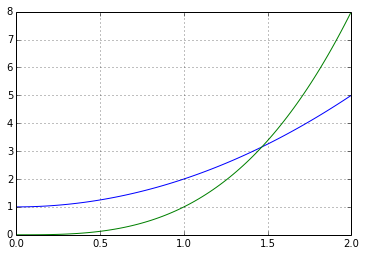

In [118]:
def f(x):
    return x**2 + 1
def g(x):
    return x**3
x = np.linspace(0,2,100)
fx = [f(xx) for xx in x]
gx = [g(xx) for xx in x]
plt.plot(x,fx)
plt.plot(x,gx)
plt.grid()

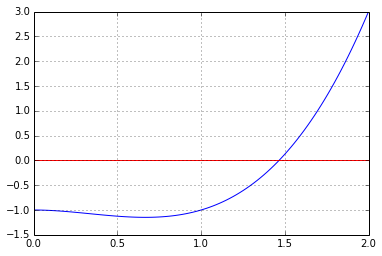

In [123]:
find_int = lambda x:  g(x) - f(x)

x = np.linspace(0,2,100)
fx = [find_int(xx) for xx in x]
plt.plot(x,fx)
plt.grid()
plt.axhline(0, c='r')

In [131]:
def newton(f, guess, h = 1e-10):
    fdx = lambda x: (f(x + h) - f(x - h)) / (2.0 * h)
    def next_guess(x):
        return x - (f(x)/fdx(x))
    guess = 2
    while (np.abs(f(guess)) > 1e-4):
        guess = next_guess(guess)
    return guess

In [132]:
newton(find_int, 2)

1.4655713748764825

3.2)(5 Points) Which method converge faster: Newton's Method or bisection?

In [ ]:
Newton

3.3) (5 Points) Does Newton's method guarantee to convege to the real answer?

In [ ]:
No

### Problem 4)  (100)

4.1)(35 points) Show that

$$f''(x) = \frac{f(x+h) -2f(x) + f(x-h)}{h^2} + O(h^2)$$

4.2)(35 points) Let
$$f(x) = x^2 \exp(x \cos (x))$$
Plot for $x \in [0,2\pi]$ the following lines

1. $f(x)$
2. $f'(x)$ caculated numerically using central difference method.
3. $f''(x)$ calculated numerically.

Pick appropriate value for $h$. Analytical answers will not be accepted.

4.3)(30 points) Plot polynomial of **degree 4** that passes through the following four points.
$$(0.1, 1), (0.2,2), (0.5, 3),  (0,4), (1, 5) $$

Make sure your polynomial is of **degree 4**.

In [134]:
xs = [0.1, 0.2, 0.5, 0, 1]
ys = [1, 2, 3, 4, 5]

def get_f(xs, y, idx):
    bottom = np.product([ 1. if (i == idx) else xs[idx] - xs[i] for i in xrange(len(xs)) ])
    def f(x):
        top = np.product([y if (i == idx) else x - xs[i] for i in xrange(len(xs)) ])
        return top/bottom
    return f

fs = [get_f(xs, ys[i], i) for i in xrange(len(xs))]
func = lambda x: sum([f(x) for f in fs])

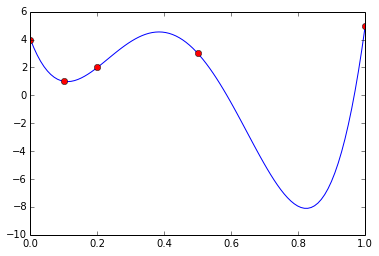

In [136]:
pxs = np.linspace(0, 1,100)
pys = [func(x) for x in pxs]
plt.plot(pxs, pys)
plt.plot(xs,ys, 'ro')

###Problem 5)  (100)

5.1) (70 points)Use trapezoid rule with 100 subdivision to find the following calculate the following integral.

$$ \int\limits_{x=1}^{x=2} \frac{1}{x^5} \; dx$$

5.2) (15 points)What is bound on **truncation error** for your answer in 3.1)

5.3) (15 points) How many subdivision do we need to make sure that our answer is at most $10^{-6}$ from the real answer?

###Problem 6) (100)

6.1) (100) Fit these data point with a straight line. Plot the data point along with the fitted line.

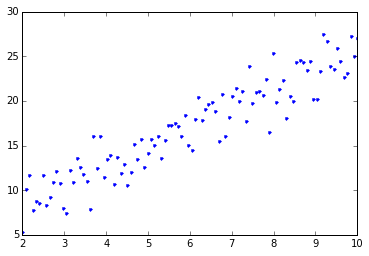

In [16]:
np.random.seed(31453)
n = 100
x = np.linspace(2,10,n)
y = 2.2222 * x + 3.3333 + np.random.randn(n)*2
plt.plot(x,y,'.')

###Problem 7) (100)

7) Do the semicircle problem from scratch.

###Problem 8)  (100)

8) Previous Midterm. Problem 6.